In [21]:
# 이미지 주소 불러오기

In [22]:
import pandas as pd

In [23]:
pd.read_csv('../크롤링/image_table.csv')

,name,page_image,title,page_link
0,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,42화,https://comic.naver.com/webtoon/detail?titleId...
1,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,41화,https://comic.naver.com/webtoon/detail?titleId...
2,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,40화,https://comic.naver.com/webtoon/detail?titleId...
3,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,39화,https://comic.naver.com/webtoon/detail?titleId...
4,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,38화,https://comic.naver.com/webtoon/detail?titleId...
...,...,...,...,...
7498,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,85화,https://comic.naver.com/webtoon/detail?titleId...
7499,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,84화,https://comic.naver.com/webtoon/detail?titleId...
7500,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,83화,https://comic.naver.com/webtoon/detail?titleId...
7501,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,82화,https://comic.naver.com/webtoon/detail?titleId...


In [24]:
pd.read_csv('../크롤링/old_image_table.csv')

,name,page_image,title,page_link
0,나이트런,https://shared-comic.pstatic.net/thumb/webtoon...,예고편,https://comic.naver.com/webtoon/detail?titleId...
1,나이트런,https://shared-comic.pstatic.net/thumb/webtoon...,1화,https://comic.naver.com/webtoon/detail?titleId...
2,나이트런,https://shared-comic.pstatic.net/thumb/webtoon...,2화,https://comic.naver.com/webtoon/detail?titleId...
3,나이트런,https://shared-comic.pstatic.net/thumb/webtoon...,3화,https://comic.naver.com/webtoon/detail?titleId...
4,나이트런,https://shared-comic.pstatic.net/thumb/webtoon...,4화,https://comic.naver.com/webtoon/detail?titleId...
...,...,...,...,...
2885,니나의 마법서랍,https://shared-comic.pstatic.net/thumb/webtoon...,6화,https://comic.naver.com/webtoon/detail?titleId...
2886,니나의 마법서랍,https://shared-comic.pstatic.net/thumb/webtoon...,7화,https://comic.naver.com/webtoon/detail?titleId...
2887,니나의 마법서랍,https://shared-comic.pstatic.net/thumb/webtoon...,8화,https://comic.naver.com/webtoon/detail?titleId...
2888,니나의 마법서랍,https://shared-comic.pstatic.net/thumb/webtoon...,9화,https://comic.naver.com/webtoon/detail?titleId...


In [25]:
title_tumb = pd.read_csv('../크롤링/basic_table.csv').link2.values

In [26]:
import numpy as np
import cv2
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [27]:
#이미지 확인

In [28]:
title_tumb[0]

'https://shared-comic.pstatic.net/thumb/webtoon/758037/thumbnail/thumbnail_IMAG06_794bcc1e-23aa-4c35-a335-b5d21b4bc2ab.jpg'

In [30]:
resp = urlopen(title_tumb[0])

In [31]:
image = np.asarray(bytearray(resp.read()), dtype='uint8')
print(image)
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

[255 216 255 ...  47 255 217]


In [32]:
image.shape

(101, 125, 3)

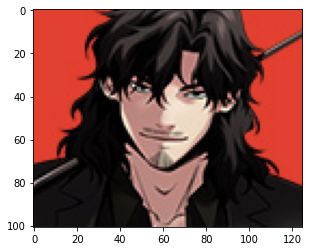

In [33]:
plt.imshow(image)

In [34]:
# 이미지 데이터 크기 확인

In [35]:
tumb = pd.DataFrame(title_tumb)

In [36]:
tumb.columns = ['url']

In [37]:
tumb['title'] = pd.read_csv('../크롤링/basic_table.csv').name

In [45]:
def extraction_image_shape(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image.shape

In [39]:
tumb[0:1].url

0    https://shared-comic.pstatic.net/thumb/webtoon...
Name: url, dtype: object

In [40]:
tumb[0:1].url.values[0]

'https://shared-comic.pstatic.net/thumb/webtoon/758037/thumbnail/thumbnail_IMAG06_794bcc1e-23aa-4c35-a335-b5d21b4bc2ab.jpg'

In [41]:
url = tumb[0:1].url.values[0]
resp = urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype='uint8')
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [42]:
image.shape

(101, 125, 3)

In [46]:
shapes = tumb.drop(16).url.apply(extraction_image_shape)

In [47]:
shapes = pd.DataFrame(shapes)

In [48]:
shapes.url.unique()

array([(101, 125, 3)], dtype=object)

In [ ]:
#gif 파일 jpg로 변환해서 불러옴

In [54]:
img = cv2.imread('thumbnail_title_21815_125x101-0000.jpg')

In [56]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [55]:
img.shape

(101, 125, 3)

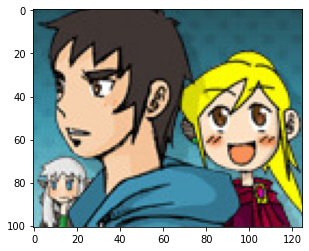

In [57]:
plt.imshow(img)

In [58]:
# 전체 이미지 사이즈는 동일